In [2]:
url_incidents = "https://www.data.gouv.fr/fr/datasets/r/a7e77e63-518e-4429-88ac-0e7255a77fc3"

In [3]:
url_regularite = "https://www.data.gouv.fr/fr/datasets/r/2a4f7375-e090-4fbb-bea4-ea280a2d1028"

# si vous n'avez pas wget

... il faut le télécharger

In [4]:
!pip install wget

You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import wget

In [6]:
wget.download(url_incidents, out='incidents_sncf.csv')

'incidents_sncf.csv'

In [7]:
wget.download(url_regularite, out='regularite_sncf.csv')

'regularite_sncf.csv'

## lire avec une commande systeme

In [8]:
!head -n 2 incidents_sncf.csv

In [9]:
!head -n 2 regularite_sncf.csv

## rentrer dans le dur 

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("regularite_sncf.csv", sep=',')

In [12]:
df2 = pd.read_csv("incidents_sncf.csv", sep=',')

In [13]:
df2

,date,famille_transport,ligne,incidents
0,2019-01-23,transilien,A,['Défaut de signalisation entre Nation et Aube...
1,2019-01-23,transilien,B,['Intervention de police à Gare-du-Nord pour u...
2,2019-01-23,transilien,C,"[""Signal d'alarme à Bibiliothèque-François-Mit..."
3,2019-01-23,transilien,D,['Restitution tardive de travaux de nuit à Com...
4,2019-01-23,transilien,E,"[""Signaux d'alarme malveillants à Haussamann-S..."
...,...,...,...,...
3740,2020-03-13,intercites,Nantes-Lyon,"[""Présence d'individus sur le pont-rail du Rhô..."
3741,2020-03-13,intercites,Toulouse-Bayonne,NaN
3742,2020-03-13,intercites,Clermont-Béziers,NaN
3743,2020-03-13,intercites,Paris-Toulouse-Latour De Carol/Cerbere/Rodez,NaN


In [14]:
df.dtypes

date                  object
famille_transport     object
ligne                 object
regularite           float64
explication           object
dtype: object

In [15]:
df

,date,famille_transport,ligne,regularite,explication
0,2019-01-23,transilien,global,84.2,NaN
1,2019-01-23,transilien,A,82.1,NaN
2,2019-01-23,transilien,B,88.9,NaN
3,2019-01-23,transilien,C,84.3,NaN
4,2019-01-23,transilien,D,74.5,NaN
...,...,...,...,...,...
4080,2020-03-13,intercites,Nantes-Lyon,75.0,NaN
4081,2020-03-13,intercites,Toulouse-Bayonne,87.5,NaN
4082,2020-03-13,intercites,Clermont-Béziers,100.0,NaN
4083,2020-03-13,intercites,Paris-Toulouse-Latour De Carol/Cerbere/Rodez,83.3,NaN


## changer la date

In [16]:
unedate = "01/12/2019"

In [17]:
pd.to_datetime(unedate)

Timestamp('2019-01-12 00:00:00')

In [18]:
une_autre_date = "24/01/2020"

In [19]:
pd.to_datetime(une_autre_date)

Timestamp('2020-01-24 00:00:00')

## difference de dates

In [20]:
diff = pd.to_datetime(une_autre_date) - pd.to_datetime(unedate)

In [21]:
diff

Timedelta('377 days 00:00:00')

In [22]:
diff.days

377

## ne pas se fier à pd.to_datetime SANS FORMAT !

In [23]:
pd.to_datetime("07/10/2019", format="%d/%m/%Y").day

7

In [24]:
pd.to_datetime("30/10/2019", format="%d/%m/%Y").day

30

## maintenant qu'on sait: convertir la colonne

In [25]:
df.date = pd.to_datetime(df.date, format="%Y/%m/%d")

In [26]:
df.dtypes

date                 datetime64[ns]
famille_transport            object
ligne                        object
regularite                  float64
explication                  object
dtype: object

In [27]:
df.columns

Index(['date', 'famille_transport', 'ligne', 'regularite', 'explication'], dtype='object')

In [28]:
df

,date,famille_transport,ligne,regularite,explication
0,2019-01-23,transilien,global,84.2,NaN
1,2019-01-23,transilien,A,82.1,NaN
2,2019-01-23,transilien,B,88.9,NaN
3,2019-01-23,transilien,C,84.3,NaN
4,2019-01-23,transilien,D,74.5,NaN
...,...,...,...,...,...
4080,2020-03-13,intercites,Nantes-Lyon,75.0,NaN
4081,2020-03-13,intercites,Toulouse-Bayonne,87.5,NaN
4082,2020-03-13,intercites,Clermont-Béziers,100.0,NaN
4083,2020-03-13,intercites,Paris-Toulouse-Latour De Carol/Cerbere/Rodez,83.3,NaN


## types de lignes SNCF sur Paris 

In [29]:
df.ligne.value_counts()

global                                          340
Paris-Toulouse-Latour De Carol/Cerbere/Rodez     85
Paris-Briançon                                   85
Nouvelle-Aquitaine                               85
Pays de la Loire                                 85
Bourgogne-Franche-Comté                          85
Hauts-de-France                                  85
sudest                                           85
nord                                             85
Paris-Clermont                                   85
L                                                85
T11                                              85
Nantes-Bordeaux                                  85
europe                                           85
Bordeaux-Marseille                               85
Toulouse-Bayonne                                 85
H                                                85
est                                              85
Centre-Val de Loire                              85
B           

In [30]:
df.famille_transport.value_counts()

transilien    1360
intercites    1110
ter           1020
tgv            595
Name: famille_transport, dtype: int64

## quelques métriques sur des valeurs continues

In [31]:
df.describe()

,regularite
count,3935.000000
mean,84.640178
std,16.431291
min,0.000000
25%,81.050000
50%,89.700000
75%,94.600000
max,100.000000


## visualization

In [32]:
%matplotlib inline

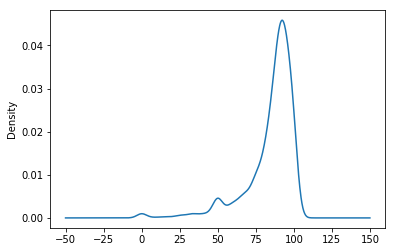

In [33]:
df.regularite.plot(kind="density")

### exercices : faire un histogramme nb de valeurs dans famille de transports

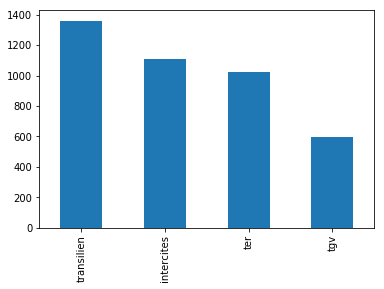

In [34]:
df_pour_histogram = df.famille_transport.value_counts().plot(kind='bar')

## grouper par catégorie

In [35]:
df.groupby(["famille_transport"])

In [36]:
for x,y in df.groupby(["famille_transport"]):
    display(x)
    display(y)

'intercites'

,date,famille_transport,ligne,regularite,explication
35,2019-01-23,intercites,global,81.9,NaN
36,2019-01-23,intercites,Paris-Limoges-Toulouse,85.0,NaN
37,2019-01-23,intercites,Paris-Clermont,93.8,NaN
38,2019-01-23,intercites,Bordeaux-Marseille,66.7,NaN
39,2019-01-23,intercites,Nantes-Bordeaux,100.0,NaN
...,...,...,...,...,...
4080,2020-03-13,intercites,Nantes-Lyon,75.0,NaN
4081,2020-03-13,intercites,Toulouse-Bayonne,87.5,NaN
4082,2020-03-13,intercites,Clermont-Béziers,100.0,NaN
4083,2020-03-13,intercites,Paris-Toulouse-Latour De Carol/Cerbere/Rodez,83.3,NaN


'ter'

,date,famille_transport,ligne,regularite,explication
16,2019-01-23,ter,global,87.8,NaN
17,2019-01-23,ter,Grand Est,91.4,NaN
18,2019-01-23,ter,Nouvelle-Aquitaine,96.4,NaN
19,2019-01-23,ter,Auvergne-Rhône-Alpes,86.5,NaN
20,2019-01-23,ter,Bourgogne-Franche-Comté,90.3,NaN
...,...,...,...,...,...
4063,2020-03-13,ter,Occitanie,91.5,NaN
4064,2020-03-13,ter,Hauts-de-France,93.6,NaN
4065,2020-03-13,ter,Normandie,94.6,NaN
4066,2020-03-13,ter,Pays de la Loire,92.9,NaN


'tgv'

,date,famille_transport,ligne,regularite,explication
28,2019-01-23,tgv,global,52.2,NaN
29,2019-01-23,tgv,nord,11.8,NaN
30,2019-01-23,tgv,est,12.3,NaN
31,2019-01-23,tgv,atlantique,88.7,NaN
32,2019-01-23,tgv,sudest,48.8,NaN
...,...,...,...,...,...
4070,2020-03-13,tgv,est,87.1,NaN
4071,2020-03-13,tgv,atlantique,83.6,NaN
4072,2020-03-13,tgv,sudest,95.7,NaN
4073,2020-03-13,tgv,ouigo,96.7,NaN


'transilien'

,date,famille_transport,ligne,regularite,explication
0,2019-01-23,transilien,global,84.2,NaN
1,2019-01-23,transilien,A,82.1,NaN
2,2019-01-23,transilien,B,88.9,NaN
3,2019-01-23,transilien,C,84.3,NaN
4,2019-01-23,transilien,D,74.5,NaN
...,...,...,...,...,...
4051,2020-03-13,transilien,P,85.8,NaN
4052,2020-03-13,transilien,R,91.9,NaN
4053,2020-03-13,transilien,U,97.7,NaN
4054,2020-03-13,transilien,T4,87.0,NaN


In [37]:
df.groupby(["famille_transport"]).mean()

,regularite
famille_transport,
intercites,72.995356
ter,90.004804
tgv,87.241176
transilien,88.283180


## définir votre propre fonction

In [38]:
def fonction(a):
    return sum(a)**2

In [39]:
df.groupby(["famille_transport"])["regularite"].apply(fonction)

famille_transport
intercites             NaN
ter           8.428140e+09
tgv           2.694492e+09
transilien             NaN
Name: regularite, dtype: float64

## filtrer un dataset

loc [ lignes , colonnes]

In [40]:
df.head()

,date,famille_transport,ligne,regularite,explication
0,2019-01-23,transilien,global,84.2,NaN
1,2019-01-23,transilien,A,82.1,NaN
2,2019-01-23,transilien,B,88.9,NaN
3,2019-01-23,transilien,C,84.3,NaN
4,2019-01-23,transilien,D,74.5,NaN


In [41]:
df.loc[1, ["ligne", "regularite", "date"] ]

ligne                           A
regularite                   82.1
date          2019-01-23 00:00:00
Name: 1, dtype: object

In [42]:
df.loc[1:3,  ["ligne", "date"]]

,ligne,date
1,A,2019-01-23
2,B,2019-01-23
3,C,2019-01-23


In [43]:
fin_aout = pd.to_datetime("31/08/2019", format="%d/%m/%Y")

In [44]:
debut_juillet = pd.to_datetime("01/06/2019", format="%d/%m/%Y")

In [45]:
entre = (df["date"] > debut_juillet) & (df["date"]< fin_aout)

In [48]:
df.loc[ entre, :]

,date,famille_transport,ligne,regularite,explication
98,2019-07-09,transilien,global,90.0,NaN
99,2019-07-09,transilien,A,91.9,NaN
100,2019-07-09,transilien,B,85.6,NaN
101,2019-07-09,transilien,C,92.4,NaN
102,2019-07-09,transilien,D,79.2,NaN
103,2019-07-09,transilien,E,95.8,NaN
104,2019-07-09,transilien,H,89.1,NaN
105,2019-07-09,transilien,J,92.4,NaN
106,2019-07-09,transilien,K,95.0,NaN
107,2019-07-09,transilien,L,95.4,NaN


### exercice: filtrer sur les RER A, B, C, D, E et F

In [49]:
df_que_RER = df.loc[ df["ligne"].isin(["A","B","C","D","E"]) , :   ]

## fonctions utiles / splits et joins

In [50]:
string = "2019-02-01"

In [51]:
string.split('-')

['2019', '02', '01']

In [52]:
liste = ["2019", "01", "30"]

In [53]:
"/".join(liste)

'2019/01/30'

## appliquer une fonction sur une colonne

In [54]:
def retrouve_le_mois_a_partir_de_strin(une_date):
    return une_date.split("-")[1]

In [57]:
retrouve_le_mois_a_partir_de_strin("2019-01-30")

'01'

In [58]:
def retrouve_le_mois(une_date_DATETIME):
    return une_date_DATETIME.month

In [59]:
df["mois"] = df.date.apply(lambda x: x.month)

In [60]:
df

,date,famille_transport,ligne,regularite,explication,mois
0,2019-01-23,transilien,global,84.2,NaN,1
1,2019-01-23,transilien,A,82.1,NaN,1
2,2019-01-23,transilien,B,88.9,NaN,1
3,2019-01-23,transilien,C,84.3,NaN,1
4,2019-01-23,transilien,D,74.5,NaN,1
...,...,...,...,...,...,...
4080,2020-03-13,intercites,Nantes-Lyon,75.0,NaN,3
4081,2020-03-13,intercites,Toulouse-Bayonne,87.5,NaN,3
4082,2020-03-13,intercites,Clermont-Béziers,100.0,NaN,3
4083,2020-03-13,intercites,Paris-Toulouse-Latour De Carol/Cerbere/Rodez,83.3,NaN,3


## Mapping de valeurs

In [61]:
dico_mapping_mois= {1:"Janvier",2:"Février",
                   3: "Mars", 4: "Avril",
                   5: "Mai", 6:"Juin",
                   7:"Juillet", 8:"Aout",
                   9:"Septembre", 10: "Octobre",
                   11:"Novembre", 12: "Décembre"}

In [62]:
dico_mapping_mois

{1: 'Janvier',
 2: 'Février',
 3: 'Mars',
 4: 'Avril',
 5: 'Mai',
 6: 'Juin',
 7: 'Juillet',
 8: 'Aout',
 9: 'Septembre',
 10: 'Octobre',
 11: 'Novembre',
 12: 'Décembre'}

In [63]:
df["mois"]=df.mois.replace(dico_mapping_mois)

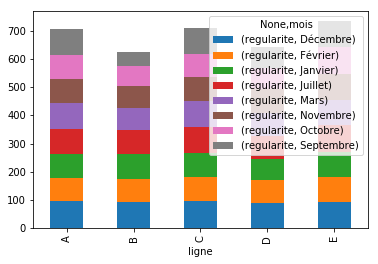

In [64]:
df[ df["ligne"].isin(["A","B","C","D","E","F"])].groupby(["ligne", "mois"]).mean().unstack().plot(kind='bar', stacked=True)

In [ ]:
!git add Mon_Premier_Notebook.ipynb
!git commit -m "manipul"
!git push origin master